
**1. Анализ целевой переменной Y с точки зрения статистики**


Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Загрузка набора данных
df = pd.read_csv('content/income.csv')

In [3]:
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [4]:
# для удобства распечатаем все колонки
for column in df.columns:
  print(f'колонка: {column}')

колонка: age
колонка: workclass
колонка: education
колонка: education-num
колонка: marital-status
колонка: occupation
колонка: relationship
колонка: race
колонка: sex
колонка: capital-gain
колонка: capital-loss
колонка: hours-per-week
колонка: native-country
колонка: income >50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      30718 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  31978 non-null  object
 13  income >50K     32561 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [6]:
# Проверка на пропущенные значения
print(df.isnull().sum())

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income >50K          0
dtype: int64


In [7]:
# Удаление строк с пропусками
df_drop = df.dropna()
print("\n# Удаление строк с пропусками")
print(df_drop.isnull().sum()) # пропусков нет



# Удаление строк с пропусками
age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income >50K       0
dtype: int64


In [8]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income >50K'],
      dtype='object')

In [9]:
Y = df['income >50K'] # выбираем целевую переменную (категориальную)
X = df.drop('income >50K', axis=1) # переменные для проверки влияния

# В моем случае я дропаю базовую переменную, а не только. Y
X = X.drop('capital-gain', axis=1)
X = X.drop('capital-loss', axis=1)

In [10]:
# Список числовых колонок для построения графиков
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
numeric_cols

,age,education-num,hours-per-week
0,39,13,40
1,50,13,13
2,38,9,40
3,53,7,40
4,28,13,40
...,...,...,...
32556,27,12,38
32557,40,9,40
32558,58,9,40
32559,22,9,20


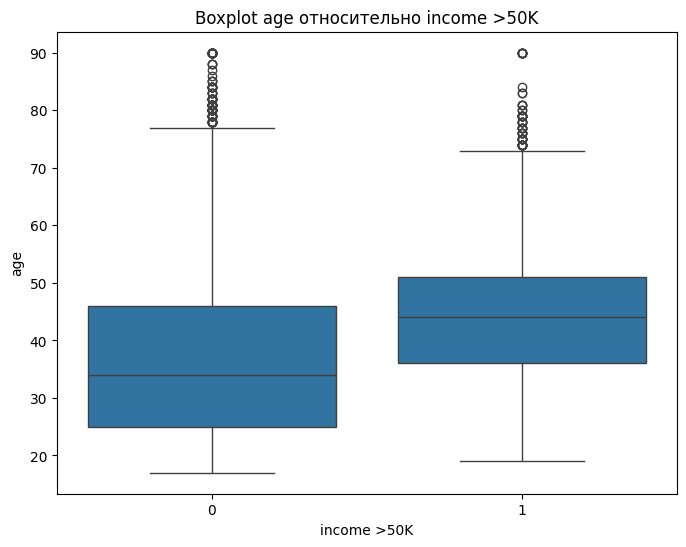

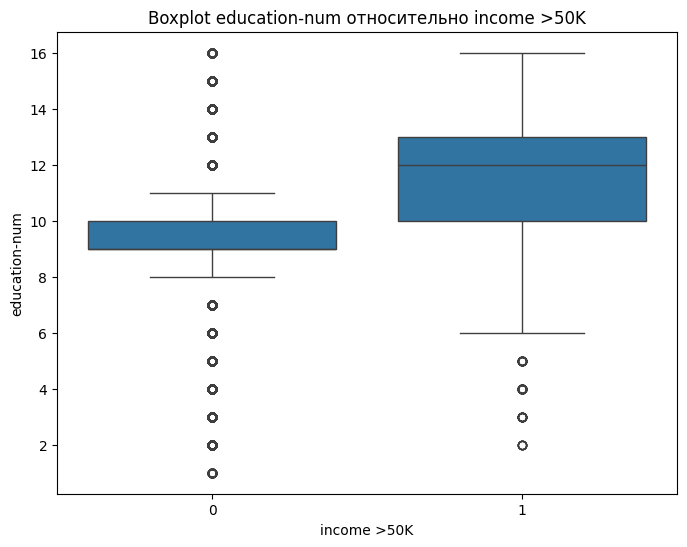

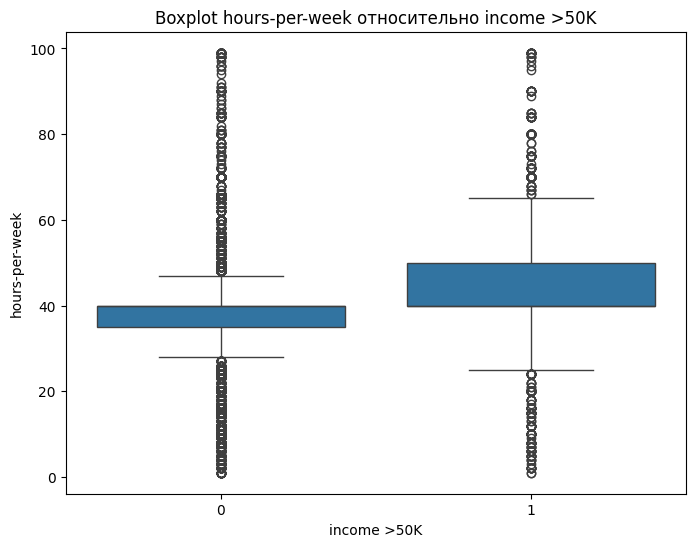

In [11]:
# Построение boxplot для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='income >50K', y=col, data=df)
    plt.title(f'Boxplot {col} относительно income >50K')
    plt.show()

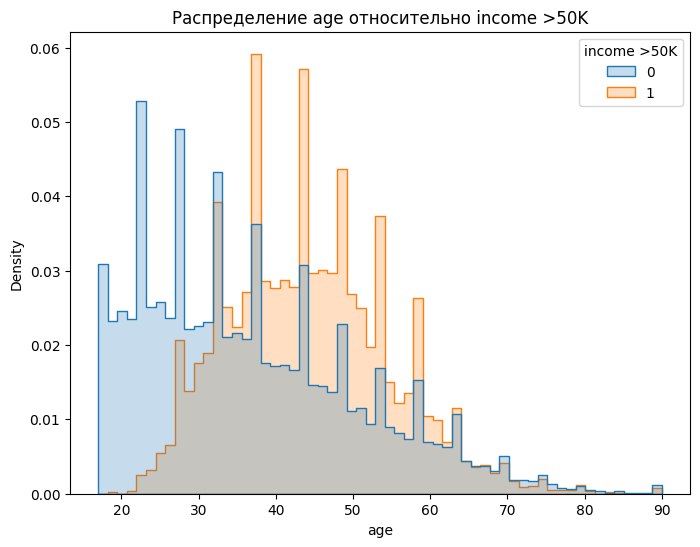

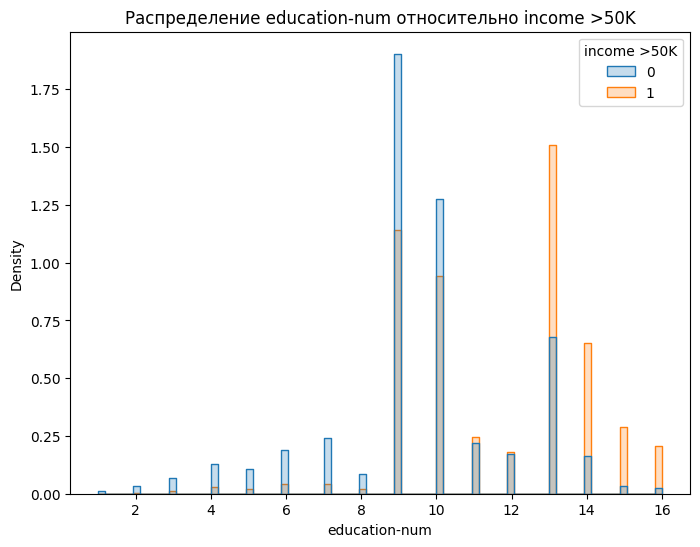

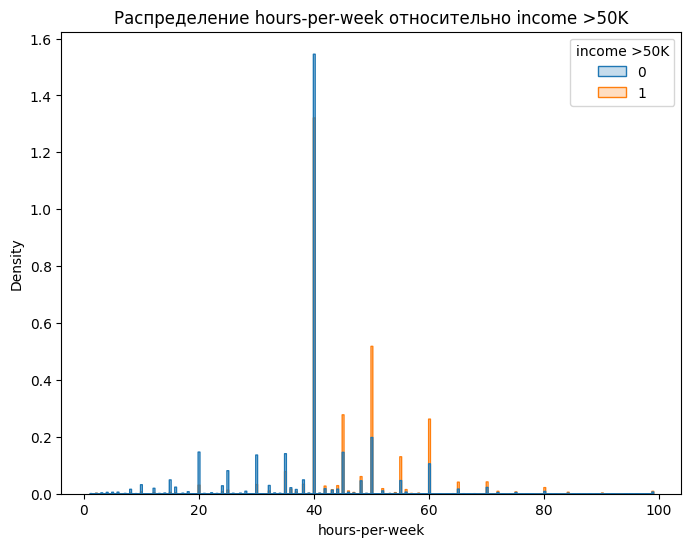

In [12]:
# Построение диаграмм распределения для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='income >50K', element="step", stat="density", common_norm=False)
    plt.title(f'Распределение {col} относительно income >50K')
    plt.show()

**Анализ графиков:**

**age относительно income >50K:**\
Судя по графику самая большая по концентрации income >50K=1 у людей в возрасте от 35 до 50.
А income >50K=0 у молодых до 30-ти лет.

**education_num относительно income >50K:**\
На графике видна зависимость income >50K от образования, так как гораздо чаще income >50K=1 при более высоком уровне образования. 

**hours_per_week относительно income >50K:**\
На графике больше всего income >50K и 0, и 1 при 40 часов в неделю, скорее всего из-за распространнённости пятидневной рабочей недели по 8 часов в день.
У людей работающих больше остальных видна большая концентрация income >50K=1. Скорее всего связано с переработками.

**Выводы:**\
На income >50K влияют или хотя бы связаны такие признаки, как edu_num, age, hours_per_week.

In [13]:
# Описательная статистика для числовых переменных, разделенная по целевой переменной
desc_stats_numeric = df.groupby('income >50K')[df.select_dtypes(include=[np.number]).columns].describe()

# Описательная статистика для категориальных переменных, разделенная по целевой переменной
desc_stats_categorical = df.groupby('income >50K')[df.select_dtypes(include=['object']).columns].describe()

In [14]:
# Проходим по каждой числовой переменной и выводим статистику отдельно
for col in numeric_cols:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('income >50K')[col].describe())
    print("\n" + "="*50 + "\n")

Описательная статистика для age:

               count       mean        std   min   25%   50%   75%   max
income >50K                                                             
0            24720.0  36.783738  14.020088  17.0  25.0  34.0  46.0  90.0
1             7841.0  44.249841  10.519028  19.0  36.0  44.0  51.0  90.0


Описательная статистика для education-num:

               count       mean       std  min   25%   50%   75%   max
income >50K                                                           
0            24720.0   9.595065  2.436147  1.0   9.0   9.0  10.0  16.0
1             7841.0  11.611657  2.385129  2.0  10.0  12.0  13.0  16.0


Описательная статистика для hours-per-week:

               count       mean        std  min   25%   50%   75%   max
income >50K                                                            
0            24720.0  38.840210  12.318995  1.0  35.0  40.0  40.0  99.0
1             7841.0  45.473026  11.012971  1.0  40.0  40.0  50.0  99.0




In [15]:

print("\nКатегориальные переменные:")
desc_stats_categorical


Категориальные переменные:


workclass                        education                    \
                count unique      top   freq     count unique        top   
income >50K                                                                
0               23075      8  Private  17733     24720     16    HS-grad   
1                7650      6  Private   4963      7841     15  Bachelors   

                  marital-status         ...   race           sex         \
             freq          count unique  ...    top   freq  count unique   
income >50K                              ...                               
0            8826          24720      7  ...  White  20699  24720      2   
1            2221           7841      7  ...  White   7117   7841      2   

                         native-country                               
              top   freq          count unique            top   freq  
income >50K                                                           
0            Male  15128          24283     41  United-States  21999  
1            Male   6662           7695     39  United-States   7171  

[2 rows x 32 columns]

***Описание статистики для переменных:***

***1. Возраст (age):***

    Средний возраст у тех, у кого прибыль мала (income >50K = 0), составляет 38.22 года. У тех, кто хоть что-то весомое заработал (income >50K = 1), средний возраст заметно выше — 45.41 года.
    Максимум - 90 и минимум - 17 у обеих груп равен.

***2. Уровень образования (education-num):***

    Средний уровень образования у мелких воротил составляет 9.99, что ниже по сравнению с акулами бизнеса (income >50K = 1) 11.85. Максимальное его значение 16, а минимальный 1. На чем основанны эти значения для меня загадка.

***3. Часы работы в неделю (hours-per-week):***

    Среднее количество рабочих часов в неделю у (income >50K = 0) обычных людей — 40.16 часов, тогда как у успешных (income >50K = 1) — 45.65 часов. Это может указывать на то, что люди с большими доходоми (income >50K = 1) обычно работают больше.
    Стандартное отклонение у трутней (income >50K = 0) составляет 12.34, что немного выше, чем у серьёзных людей (income >50K = 1) 11.20, что указывает на большее стандартное отклонение(std) среди тех, кто работает меньше.

***Выводы:***

    Люди при деньгах (income >50K = 1) в среднем старше, лучше образованы, работают больше и почти все имеют доход выше 50 тысяч долларов. Также у них отсутствуют потери капитала, что может указывать на более грамотное управление финансами.
    Обычные люди (income >50K = 0) чаще работают меньше часов, имеют меньший доход.


***2. Расчет теста Пирсона***


In [16]:
df[df.select_dtypes(include=[np.number]).columns].corr()

,age,education-num,capital-gain,capital-loss,hours-per-week,income >50K
age,1.000000,0.036527,0.077674,0.057775,0.068756,0.234037
education-num,0.036527,1.000000,0.122630,0.079923,0.148123,0.335154
capital-gain,0.077674,0.122630,1.000000,-0.031615,0.078409,0.223329
capital-loss,0.057775,0.079923,-0.031615,1.000000,0.054256,0.150526
hours-per-week,0.068756,0.148123,0.078409,0.054256,1.000000,0.229689
income >50K,0.234037,0.335154,0.223329,0.150526,0.229689,1.000000


**Интерпретация корреляций:**


**1. education-num и income >50K (0.335):**

    Имеется нормальная корреляция между уровнем образования и доходом свыше 50K. Эта связь логична: более высокое образование часто ассоциируется с более высокими доходами.

**2. income >50K и capital-gain (0.223):**

    Относительно слабая, но всё-таки положительная корреляция между доходом свыше 50K и приростом капитала. Это тоже ожидаемо: люди с высокими доходами, вероятно, чаще имеют большую прибыль.

**3. education-num и stonks (0.159):**

    Слабая положительная корреляция между количеством лет образования и переменной stonks. Это может свидетельствовать о том, что образование частично связано с уровнем дохода, но не настолько сильно.

**4. age и income >50K (0.234):**

    Умеренная положительная корреляция между возрастом и доходом выше 50K. Это может быть связано с тем, что люди старшего возраста чаще имеют более высокие доходы, так как они могут находиться на более высоких карьерных позициях.

**5. capital-gain и age (0.078):**

    Очень слабая положительная корреляция между возрастом и капитальными доходами. Это может свидетельствовать о том, что люди с возрастом больший прирост капитала.

**6. education-num и hours-per-week (0.148):**

    Слабая положительная корреляция между уровнем образования и количеством рабочих часов в неделю. Это может говорить о том, что люди с большим уровнем образования имеют тенденцию больше работать, но связь слабая.

***3. Немного машинного обучения***

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, log_loss

In [18]:
# Выбираем категориальные признаки
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print("Категориальные признаки:", categorical_features)

Категориальные признаки: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


In [19]:
# Создаем копию данных
X_processed = X.copy()

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.


In [20]:
X_processed

,age,education-num,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13,40,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,50,13,13,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,9,40,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,7,40,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,13,40,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,38,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32557,40,9,40,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32558,58,9,40,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32559,22,9,20,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [21]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['float64', 'int64']).columns.tolist()

print("Числовые признаки:", numeric_features)

Числовые признаки: ['age', 'education-num', 'hours-per-week']


In [22]:
# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])

In [23]:

X_processed

,age,education-num,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.301370,0.800000,0.397959,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,0.452055,0.800000,0.122449,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.287671,0.533333,0.397959,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0.493151,0.400000,0.397959,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0.150685,0.800000,0.397959,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.733333,0.377551,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32557,0.315068,0.533333,0.397959,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32558,0.561644,0.533333,0.397959,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32559,0.068493,0.533333,0.193878,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [24]:
def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model

In [25]:
# Обучение модели
model = train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.8362
Точность на тестовой выборке: 0.8359

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      4945
           1       0.70      0.56      0.62      1568

    accuracy                           0.84      6513
   macro avg       0.78      0.74      0.76      6513
weighted avg       0.83      0.84      0.83      6513



In [26]:
# Получение коэффициентов модели
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]
})

# Сортировка по абсолютному значению коэффициента
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])

                                 Feature  Coefficient
2                         hours-per-week     2.980139
1                          education-num     2.330176
0                                    age     1.959561
26     marital-status_Married-civ-spouse     1.772423
23                 education_Prof-school     1.639551
..                                   ...          ...
27  marital-status_Married-spouse-absent     0.026965
90        native-country_Trinadad&Tobago    -0.019659
66                  native-country_Haiti     0.006612
67     native-country_Holand-Netherlands    -0.005219
69                   native-country_Hong    -0.002264

[94 rows x 2 columns]


In [27]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация с 5 фолдами
scores = cross_val_score(model, X_processed, Y, cv=5, scoring='accuracy')

print(f"Средняя точность при кросс-валидации: {scores.mean():.4f}")
print(f"Отклонение точности: {scores.std():.4f}")

Средняя точность при кросс-валидации: 0.8344
Отклонение точности: 0.0054


In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42, stratify=Y)

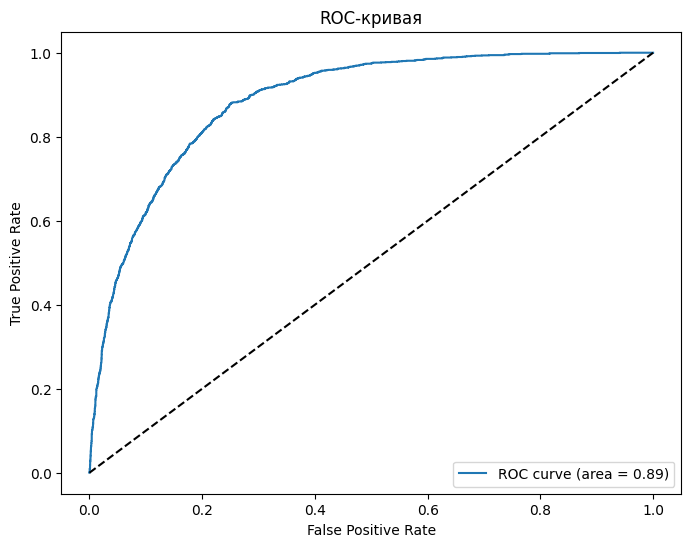

In [29]:
from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей для тестовой выборки
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

**Доп задание**\
Не изучил, но посмотрел.

In [30]:
def train_and_evaluate_self(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_precision = precision_score(Y_train, Y_train_pred)
    train_recall = recall_score(Y_train, Y_train_pred)
    train_f1 = f1_score(Y_train, Y_train_pred)
    train_roc = roc_auc_score(Y_train, Y_train_pred)
    train_log_loss_res = log_loss(Y_train, Y_train_pred)
    

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_precision = precision_score(Y_test, Y_test_pred)
    test_recall = recall_score(Y_test, Y_test_pred)
    test_f1 = f1_score(Y_test, Y_test_pred)
    test_roc = roc_auc_score(Y_test, Y_test_pred)
    test_log_loss_res = log_loss(Y_test, Y_test_pred)

    # Вывод результатов
    
    print(f"Точность на обучающей выборке Precision: {train_precision:.4f}")
    print(f"Точность на обучающей выборке Precision: {test_precision:.4f}")
    
    print(f"Точность на обучающей выборке Recall: {train_recall:.4f}")
    print(f"Точность на обучающей выборке Recall: {test_recall:.4f}")
    
    print(f"Точность на обучающей выборке F1 Score: {train_f1:.4f}")
    print(f"Точность на обучающей выборке F1 Score: {test_f1:.4f}")

    print(f"Точность на обучающей выборке ROC-AUC: {train_roc:.4f}")
    print(f"Точность на обучающей выборке ROC-AUC: {test_roc:.4f}")

    print(f"Точность на обучающей выборке Log Loss: {train_log_loss_res:.4f}")
    print(f"Точность на обучающей выборке Log Loss: {test_log_loss_res:.4f}")
    
    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model

In [31]:
# Обучение модели
model = train_and_evaluate_self(X_processed, Y)

Точность на обучающей выборке Precision: 0.7024
Точность на обучающей выборке Precision: 0.6991
Точность на обучающей выборке Recall: 0.5549
Точность на обучающей выборке Recall: 0.5587
Точность на обучающей выборке F1 Score: 0.6200
Точность на обучающей выборке F1 Score: 0.6211
Точность на обучающей выборке ROC-AUC: 0.7402
Точность на обучающей выборке ROC-AUC: 0.7412
Точность на обучающей выборке Log Loss: 5.9044
Точность на обучающей выборке Log Loss: 5.9160

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      4945
           1       0.70      0.56      0.62      1568

    accuracy                           0.84      6513
   macro avg       0.78      0.74      0.76      6513
weighted avg       0.83      0.84      0.83      6513

